hw1：svm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#讀檔
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_label = train_data['Attribute17']

In [3]:
print(test_data.shape)
print(train_data.shape)

(806, 16)
(17103, 17)


資料預處理

In [4]:
df = train_data
tf = test_data

In [5]:
#刪除日期
train_data.drop('Attribute1', axis = 1, inplace = True)
test_data.drop('Attribute1', axis = 1, inplace = True)

In [6]:
train_data.columns

Index(['Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6',
       'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10', 'Attribute11',
       'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15',
       'Attribute16', 'Attribute17'],
      dtype='object')

In [7]:
#找尋遺失資料
train_data.isnull().sum()

Attribute2        0
Attribute3       71
Attribute4       32
Attribute5      161
Attribute6     7401
Attribute7     8231
Attribute8     1093
Attribute9     1086
Attribute10     432
Attribute11     306
Attribute12     415
Attribute13    1669
Attribute14    6952
Attribute15     294
Attribute16     161
Attribute17       0
dtype: int64

In [8]:
#train_label
for i in range(len(train_label)):
    if train_label[i] == 'Yes':
        train_label[i] = 1
    else:
        train_label[i] = 0
        
train_label = train_label.astype(int)

print(type(train_label))
train_label

<class 'pandas.core.series.Series'>


0        0
1        0
2        1
3        1
4        0
        ..
17098    0
17099    0
17100    0
17101    0
17102    0
Name: Attribute17, Length: 17103, dtype: int64

In [9]:
#非數字類別資料轉換
categorical = [var for var in df.columns if df[var].dtype == '0']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#將NaN以眾數mode取代
df['Attribute8'].fillna(df['Attribute8'].mode()[0], inplace = True)
df['Attribute10'].fillna(df['Attribute10'].mode()[0], inplace = True)
df['Attribute16'].fillna(df['Attribute16'].mode()[0], inplace = True)
df['Attribute17'].fillna(df['Attribute17'].mode()[0], inplace = True)
tf['Attribute8'].fillna(tf['Attribute8'].mode()[0], inplace = True)
tf['Attribute10'].fillna(tf['Attribute10'].mode()[0], inplace = True)
tf['Attribute16'].fillna(tf['Attribute16'].mode()[0], inplace = True)

#非數字類別以數字替代
df['Attribute8']= label_encoder.fit_transform(df['Attribute8'])
df['Attribute10']= label_encoder.fit_transform(df['Attribute10'])
df['Attribute16']= label_encoder.fit_transform(df['Attribute16'])
df['Attribute17']= label_encoder.fit_transform(df['Attribute17'])
tf['Attribute8']= label_encoder.fit_transform(tf['Attribute8'])
tf['Attribute10']= label_encoder.fit_transform(tf['Attribute10'])
tf['Attribute16']= label_encoder.fit_transform(tf['Attribute16'])
df

There are 0 categorical variables

The categorical variables are : []


,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17
0,2,9.2,28.0,0.0,NaN,NaN,4,24.0,0,9.0,16.0,1012.8,NaN,26.5,0,0
1,2,7.7,26.7,0.0,NaN,NaN,13,35.0,13,17.0,19.0,1010.1,NaN,25.5,0,0
2,2,15.9,21.7,2.2,NaN,NaN,5,31.0,1,13.0,91.0,1004.2,8.0,17.0,1,1
3,2,15.9,18.6,15.6,NaN,NaN,13,61.0,6,28.0,93.0,993.0,8.0,15.8,1,1
4,2,13.7,37.9,0.0,NaN,NaN,13,52.0,14,26.0,8.0,1006.7,NaN,36.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17098,41,12.7,22.2,0.0,NaN,NaN,0,37.0,2,13.0,34.0,1021.7,8.0,21.0,0,0
17099,41,0.5,21.7,0.0,NaN,NaN,0,43.0,1,20.0,19.0,1025.0,NaN,20.5,0,0
17100,41,2.4,19.1,0.0,NaN,NaN,0,33.0,0,17.0,24.0,1026.2,NaN,18.8,0,0
17101,41,7.4,20.6,0.0,NaN,NaN,0,35.0,0,17.0,33.0,1023.3,NaN,20.3,0,0


In [10]:
#Attribute8, Attribute10, Attribute16
df.isna().sum()
#tf.isna().sum()
#train_label.isna().sum()

Attribute2        0
Attribute3       71
Attribute4       32
Attribute5      161
Attribute6     7401
Attribute7     8231
Attribute8        0
Attribute9     1086
Attribute10       0
Attribute11     306
Attribute12     415
Attribute13    1669
Attribute14    6952
Attribute15     294
Attribute16       0
Attribute17       0
dtype: int64

In [11]:
#數字類別
numerical = [var for var in df.columns if df[var].dtype != '0']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

#將NaN以中位數median取代
df = df.fillna(df.median())
tf = tf.fillna(tf.median())
tf

There are 16 numerical variables

The numerical variables are : ['Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10', 'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute16', 'Attribute17']


,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,10,10.5,19.5,0.2,3.4,2.9,5,28.0,14,7.0,56.0,1011.5,8.0,16.8,0
1,10,8.7,17.7,0.0,13.0,9.7,15,63.0,13,31.0,24.0,1011.4,5.0,16.3,0
2,10,17.5,33.5,0.0,13.6,12.5,15,39.0,7,9.0,13.0,1012.0,1.0,30.7,0
3,10,18.5,30.3,0.0,8.6,11.4,8,28.0,8,13.0,18.0,1017.5,1.0,28.8,0
4,10,9.4,13.3,4.6,1.8,0.0,12,39.0,13,11.0,83.0,1007.9,7.0,13.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,13,23.8,33.9,0.0,6.8,10.8,0,52.0,2,28.0,32.0,1012.3,3.0,33.4,0
802,13,20.6,33.4,0.0,7.2,10.5,2,41.0,8,6.0,29.0,1011.3,1.0,32.1,0
803,13,25.7,37.5,0.0,8.0,11.5,0,50.0,3,15.0,16.0,1009.1,1.0,36.8,0
804,13,25.3,33.6,2.4,3.4,7.5,14,35.0,14,24.0,60.0,1004.3,6.0,32.9,1


In [12]:
df.isnull().sum()
#tf.isnull().sum()
#df.info()

Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
dtype: int64

In [13]:
#增加溫差欄位
df['temp'] = df['Attribute3'] - df['Attribute4']
tf['temp'] = df['Attribute3'] - df['Attribute4']

<AxesSubplot:>

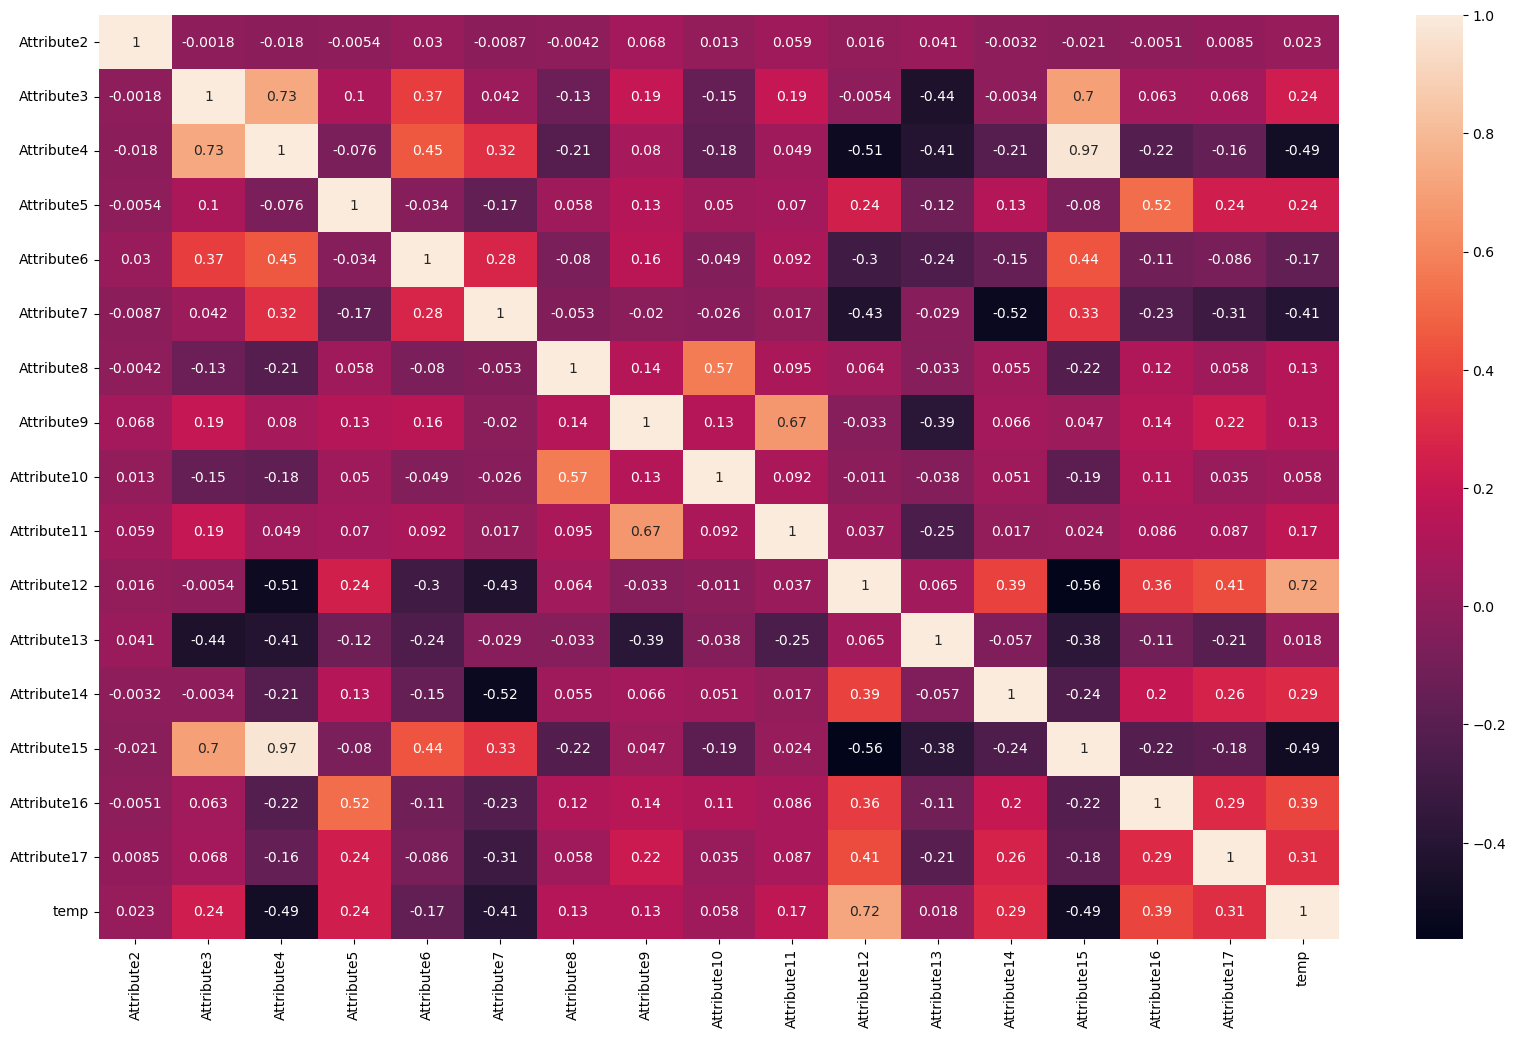

In [14]:
cor = df.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor, annot = True)

In [15]:
related = cor['Attribute17'].sort_values(ascending = False)
related

Attribute17    1.000000
Attribute12    0.414110
temp           0.310791
Attribute16    0.292470
Attribute14    0.263635
Attribute5     0.240634
Attribute9     0.218364
Attribute11    0.086826
Attribute3     0.067870
Attribute8     0.058426
Attribute10    0.034607
Attribute2     0.008545
Attribute6    -0.085885
Attribute4    -0.156554
Attribute15   -0.184802
Attribute13   -0.205373
Attribute7    -0.307811
Name: Attribute17, dtype: float64

In [60]:
#找出相關係數為正的欄位
x = []
for i in range(len(related)):
    if related[i] > 0:
        x.append(related.index[i])
print(x)

#挑選相關係數>0欄位 + 相關係數<-0.10的欄位
x = df[['Attribute12', 'temp', 'Attribute16', 'Attribute14', 'Attribute5', 'Attribute9', 
        'Attribute11', 'Attribute3', 'Attribute8', 'Attribute10', 'Attribute2', 
        'Attribute4', 'Attribute15', 'Attribute13', 'Attribute7']]
xt = tf[['Attribute12', 'temp', 'Attribute16', 'Attribute14', 'Attribute5', 'Attribute9', 
         'Attribute11', 'Attribute3', 'Attribute8', 'Attribute10', 'Attribute2', 
         'Attribute4', 'Attribute15', 'Attribute13', 'Attribute7']]
#x.drop('Attribute17', inplace = True, axis = 1)
xt

['Attribute17', 'Attribute12', 'temp', 'Attribute16', 'Attribute14', 'Attribute5', 'Attribute9', 'Attribute11', 'Attribute3', 'Attribute8', 'Attribute10', 'Attribute2']


,Attribute12,temp,Attribute16,Attribute14,Attribute5,Attribute9,Attribute11,Attribute3,Attribute8,Attribute10,Attribute2,Attribute13,Attribute7
0,56.0,-18.8,0,8.0,0.2,28.0,7.0,10.5,5,14,10,1011.5,2.9
1,24.0,-19.0,0,5.0,0.0,63.0,31.0,8.7,15,13,10,1011.4,9.7
2,13.0,-5.8,0,1.0,0.0,39.0,9.0,17.5,15,7,10,1012.0,12.5
3,18.0,-2.7,0,1.0,0.0,28.0,13.0,18.5,8,8,10,1017.5,11.4
4,83.0,-24.2,1,7.0,4.6,39.0,11.0,9.4,12,13,10,1007.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,32.0,-12.6,0,3.0,0.0,52.0,28.0,23.8,0,2,13,1012.3,10.8
802,29.0,-16.7,0,1.0,0.0,41.0,6.0,20.6,2,8,13,1011.3,10.5
803,16.0,-15.5,0,1.0,0.0,50.0,15.0,25.7,0,3,13,1009.1,11.5
804,60.0,-17.3,1,6.0,2.4,35.0,24.0,25.3,14,14,13,1004.3,7.5


平衡資料：0/1預測結果數量差距太大

In [61]:
#計算數量
y = train_label
y.value_counts()

0    13965
1     3138
Name: Attribute17, dtype: int64

In [62]:
#計算出現機率
y.value_counts()/np.float(len(df))

0    0.816523
1    0.183477
Name: Attribute17, dtype: float64

In [63]:
#平衡資料
from imblearn.over_sampling import SMOTE

bal = SMOTE()
x, y = bal.fit_resample(x, y)

In [64]:
#已平衡
y.value_counts()

0    13965
1    13965
Name: Attribute17, dtype: int64

In [65]:
x.describe()

,Attribute12,temp,Attribute16,Attribute14,Attribute5,Attribute9,Attribute11,Attribute3,Attribute8,Attribute10,Attribute2,Attribute13,Attribute7
count,27930.000000,27930.000000,27930.000000,27930.000000,27930.000000,27930.000000,27930.000000,27930.000000,27930.000000,27930.000000,27930.000000,27930.000000,27930.000000
mean,57.362208,-9.935203,0.250412,5.112024,3.513777,41.771855,19.160021,12.441003,8.120229,7.766774,23.633942,1014.427609,7.525877
std,21.294706,4.819312,0.433258,1.975178,10.179042,13.984356,8.810308,6.199367,4.485152,4.356482,14.145145,6.706190,2.885211
min,1.000000,-31.200000,0.000000,0.000000,0.000000,7.000000,0.000000,-8.500000,0.000000,0.000000,0.000000,977.100000,0.000000
25%,43.000000,-13.022779,0.000000,5.000000,0.000000,32.623381,13.000000,8.100000,4.000000,4.000000,11.000000,1010.100000,6.500000
50%,57.520933,-9.000000,0.000000,5.000000,0.066976,39.000000,19.000000,12.100000,9.000000,8.000000,23.000000,1015.100000,8.600000
75%,72.729842,-6.300000,1.000000,6.774534,2.200000,49.374297,24.000000,16.835095,12.000000,11.000000,36.000000,1018.416818,8.600000
max,100.000000,-0.050000,1.000000,8.000000,156.000000,126.000000,72.000000,31.000000,15.000000,15.000000,48.000000,1038.900000,14.300000


Feature Scaling 標準化資料

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_sta = scaler.fit_transform(x)
x_sta = pd.DataFrame(x_sta, columns=[x.columns])

xt_sta = scaler.fit_transform(xt)
xt_sta = pd.DataFrame(xt_sta, columns=[xt.columns])

In [67]:
x_sta.describe()

,Attribute12,temp,Attribute16,Attribute14,Attribute5,Attribute9,Attribute11,Attribute3,Attribute8,Attribute10,Attribute2,Attribute13,Attribute7
count,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04,2.793000e+04
mean,-2.143529e-15,-2.274068e-15,-9.888100e-15,-1.630893e-14,1.165122e-14,-2.209670e-15,-2.842429e-15,-5.957521e-16,7.426688e-16,5.948220e-16,-1.119445e-16,4.905190e-15,1.732796e-14
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-2.646818e+00,-4.412493e+00,-5.779842e-01,-2.588180e+00,-3.452034e-01,-2.486527e+00,-2.174767e+00,-3.377987e+00,-1.810501e+00,-1.782840e+00,-1.670846e+00,-5.566242e+00,-2.608479e+00
25%,-6.744618e-01,-6.406789e-01,-5.779842e-01,-5.671679e-02,-3.452034e-01,-6.542051e-01,-6.991959e-01,-7.002459e-01,-9.186540e-01,-8.646521e-01,-8.931805e-01,-6.453271e-01,-3.555704e-01
50%,7.453860e-03,1.940567e-01,-5.779842e-01,-5.671679e-02,-3.386235e-01,-1.982147e-01,-1.816321e-02,-5.500717e-02,1.961553e-01,5.353634e-02,-4.481773e-02,1.002661e-01,3.722924e-01
75%,7.216775e-01,7.543127e-01,1.730151e+00,8.417168e-01,-1.290692e-01,5.436488e-01,5.493640e-01,7.088096e-01,8.650409e-01,7.421776e-01,8.742420e-01,5.948654e-01,3.722924e-01
max,2.002308e+00,2.051202e+00,1.730151e+00,1.462161e+00,1.498068e+01,6.023134e+00,5.997625e+00,2.993746e+00,1.533927e+00,1.660366e+00,1.722605e+00,3.649290e+00,2.347920e+00


In [68]:
xt_sta.describe()

,Attribute12,temp,Attribute16,Attribute14,Attribute5,Attribute9,Attribute11,Attribute3,Attribute8,Attribute10,Attribute2,Attribute13,Attribute7
count,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02,8.060000e+02
mean,-1.057880e-16,-4.331385e-16,3.168130e-17,-9.256450e-17,-1.673599e-16,-1.566847e-18,-2.486293e-16,-2.504200e-16,-1.129507e-17,-1.041351e-16,-3.655747e-16,-7.174429e-15,2.511088e-16
std,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00,1.000621e+00
min,-2.511448e+00,-2.838504e+00,-6.647259e-01,-1.884840e+00,-3.757276e-01,-2.195368e+00,-1.975076e+00,-2.592109e+00,-1.610166e+00,-1.586200e+00,-1.774560e+00,-3.923437e+00,-1.590898e+00
25%,-6.497973e-01,-7.350386e-01,-6.647259e-01,-1.124489e+00,-3.757276e-01,-6.715182e-01,-7.735511e-01,-7.761094e-01,-9.783285e-01,-9.541248e-01,-9.485726e-01,-6.521947e-01,-9.259002e-01
50%,-1.382975e-02,-6.192958e-02,-6.647259e-01,3.962127e-01,-3.757276e-01,-1.173911e-01,-1.181739e-01,-7.072130e-02,7.473342e-02,9.933354e-02,1.134110e-01,-1.768646e-02,1.331707e-01
75%,6.799531e-01,7.741980e-01,1.504380e+00,7.763881e-01,-7.742996e-02,5.060020e-01,6.464328e-01,7.697412e-01,9.171829e-01,9.421002e-01,9.000655e-01,6.450221e-01,8.720574e-01
max,2.021267e+00,2.525333e+00,1.504380e+00,1.156564e+00,1.076072e+01,4.454158e+00,4.906385e+00,2.225542e+00,1.549020e+00,1.574175e+00,1.765386e+00,3.112554e+00,1.734092e+00


svm 建模

Run SVM with rbf kernel and C=1, 100, 1000

In [69]:
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score

# C=1, kernel=rbf, gamma=auto
svc = SVC()
svc.fit(x_sta, y)

test_label = svc.predict(xt_sta)
#test_label

In [26]:
# C=100
svc = SVC(C = 100.0)
svc.fit(x_sta, y)

test_label_c100 = svc.predict(xt_sta)
#test_label_c100

In [27]:
# C=10，準確度下降
svc = SVC(C = 10.0)
svc.fit(x_sta, y)

test_label_c10 = svc.predict(xt_sta)
#test_label_c10

Run SVM with linear kernel 

In [28]:
# kernel=linear, C=1
linear_svc = SVC(kernel = 'linear', C = 1.0) 

linear_svc.fit(x_sta, y)

test_label_Lc1 = linear_svc.predict(xt_sta)
#test_label_Lc1

In [70]:
# C=10，輸出資料
linear_svc = SVC(kernel = 'linear', C = 10.0) 

linear_svc.fit(x_sta, y)

test_label_Lc10 = linear_svc.predict(xt_sta)
test_label_Lc10

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,

Run SVM with polynomial kernel and C=1.0

In [29]:
#準確度下降
poly_svc = SVC(kernel = 'poly', C = 100.0) 

poly_svc.fit(x_sta, y)

test_label_Pc100 = poly_svc.predict(xt_sta)
#test_label_Pc100

In [71]:
#整理輸出資料
output = pd.DataFrame(data = test_label_Lc10)
output = output.reset_index()
output['id'] = output['index']
output['ans'] = output[0]
output['id'] = output['id'].astype(float)
del output['index']
del output[0]
output

,id,ans
0,0.0,1
1,1.0,0
2,2.0,0
3,3.0,0
4,4.0,1
...,...,...
801,801.0,0
802,802.0,0
803,803.0,0
804,804.0,0


In [72]:
#輸出資料
import csv
with open('ex_submit.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile) #建立csv檔寫入器
    writer.writerow(['id', 'ans']) #建立標題
    #轉換格式
    for i in range(len(output)):
        writer.writerow([float(output['id'][i]), int(output['ans'][i])])